# Project: Investigate a Dataset (No Show Medical Appointment)



# Table of Content:
 #### Introduction
 #### Data Wrangling
 #### Exploratory Data Analysis
 #### Conclusions.




# Introduction:
 Dataset description :
This dataset collects information from 100k medical appointments in Brazil and is focused on what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


# Features description

1 PatientId: Identification of a patient

2 AppointmentID: Identification of each appointment

3 Gender: Male or Female . Female has the greater proportion, woman takes way more care of their health in comparison to man.

4 ScheduledDay: The day someone called or registered for the appointment, this is before appointment.

5 AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.

6 Age: How old is the patient.

7 Neighbourhood: Where the appointment takes place.

8 Scholarship: 1 or 0 .

9 Hipertension: 1 or 0

10 Diabetes: 1 0r 0 

11 Alcoholism: 1 or 0

12 Handcap: 1 or more handcap

13 SMS_received: 1 or 0.

14 No-show: Yes or No."Yes" means patient missed appointment and "No" means patient attended appointment.
 

# Questions for Analysis

1 What gender would most likely show up for the appointment. 

2 What age group would most likely show up for the appointment.

3 Does receiving sms by a certain age group makes a patient to show up or not?
what gender most likey will respond to this?

4 Does receiving a scholarship by a certain age group makes a patient to show up on the appointment day? what gender most likely will respond to this.

5 What is the average mean of age group of patient that received scholarship?

6 Does waiting days determines whether a patient will show up or not




In [50]:
#importing all necessary libraries for this project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Wrangling :
I load data from csv file to a pandas dataframe and also shows some details about  the dataset.  






In [51]:
# I Load my data and print out a few lines.
df_show = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [52]:
# i print out the last few lines of the dataset.
df_show.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


I will further explore the dataset by going through its data types(if there is need to change the data types),Check for NaNs or duplicated rows, number of columns and roles and if there is need to drop any columns before EDA.

In [53]:
# view dimensions of dataframe.
df_show.shape

(110527, 14)

In [54]:
#checking for the number of columns,rows and the data types. 
df_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset consists of 110527 rows with 14 columns(13 independent feature and 1 dependent features)

There are no NaNs(missing values).

PatientId and AppointmentId columns wouldn't be helpful during analysis so I will need to drop them.

ScheduledDay and AppointmentDay needs to be casted to datetime datatype.

In [55]:
#checking for the sum of duplicate values.
df_show.duplicated().sum()

0

There are no duplicate values.

In [56]:
# checking for the general statistics summary of the dataset.
df_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Age columns has inconsistent unique values that needs to be handled(it also has a negative value which need to be dropped).

In [57]:
# checking for unique count in each column
df_show.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [58]:
#checking for the unique value of age group.
df_show['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [59]:
# checking for number of counts for the unique values.
df_show['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [60]:
df_show['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Handcap columns has unique values that need to be handled(column needs to be either 1 or 0 values).

# Data Cleaning

Dropping of AppointmentId and PatientId

Dropping of negative values in the age columns(values less than 0)

Renaming NO-show column to an appropriate format(No_show)

Renaming Hipertension column to the appropriate spelling(Hypertension)

Renaming Handcap column to the appropriate spelling(Handicap)

Changing the scheduledday and appointmentday to datetime types

Filling in Handicap value greater than 0 to be 1(value either to be 0 or 1)



In [61]:
# dropping patientid and appointmentid columns

df_show.drop(['AppointmentID', 'PatientId'], axis=1, inplace=True)

In [62]:
#exploring values less than 0
df_show.query('Age < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


This shows that just one patient has a negative age, this could be as a result of data entry error.it needs to be dropped.

In [63]:
# dropping row with negative age and confirming changes
df_show.drop(df_show[df_show['Age'] < 0].index, inplace = True)
df_show[df_show['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [64]:
# Renaming columns to conform to standard naming,mispelled columns and confirming changes
df_show.rename(columns={'No-show':'No_show', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)
df_show.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [65]:
# importing the library to cast from object to datetime datatype.
import datetime

In [66]:
# Changing scheduleDay and AppointmentDay datatype to datetime
df_show['ScheduledDay'] = pd.to_datetime(df_show['ScheduledDay'])
df_show['AppointmentDay'] = pd.to_datetime(df_show['AppointmentDay'])

In [67]:
#confirming changes.
df_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hypertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handicap        110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  No_show         110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


In [68]:
#viewing rows with values of handcap > 1, filling the bigger values with 1 and confirming changes
df_show[df_show['Handicap'] > 1]
df_show.loc[df_show['Handicap'].isin([2, 3, 4]), 'Handicap'] = 1
df_show['Handicap'].unique()

array([0, 1])

# Exploratory Data Analysis
checking the distribution of all features using histogram plot.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb87f7435e0>,
      dtype=object)

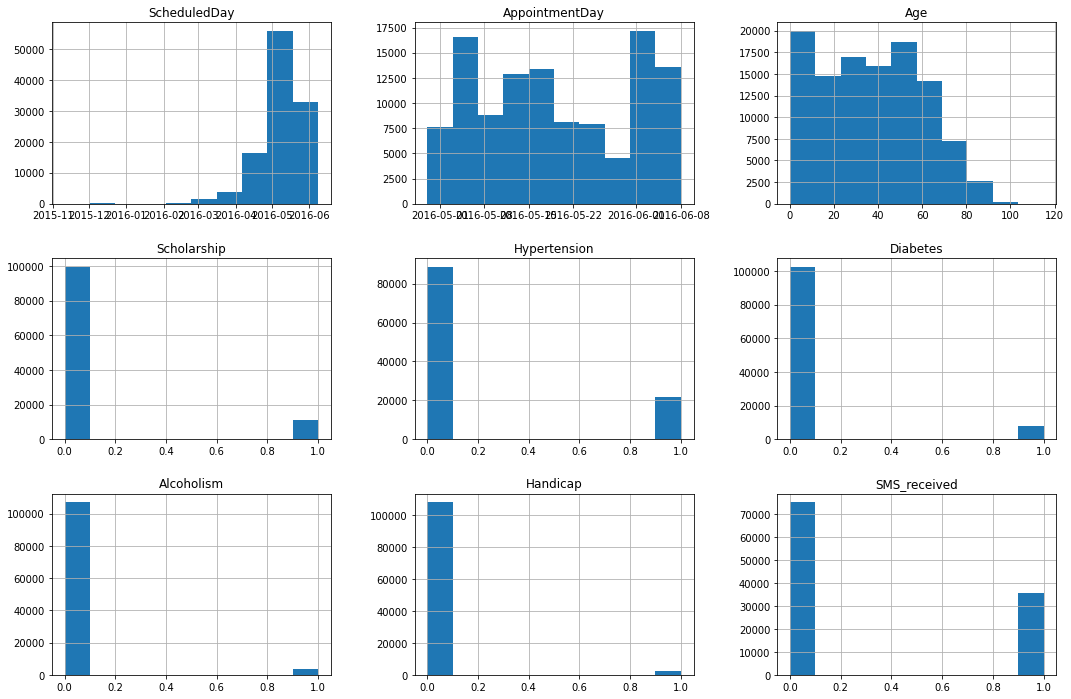

In [69]:
#visualize histogram of features
df_show.hist(figsize=(18,12))

#1 What gender would most likely show up for the appointment. 

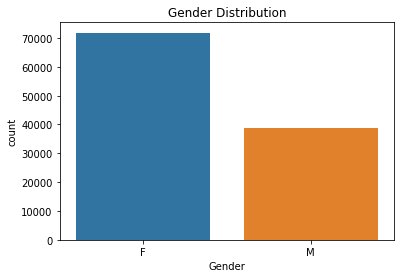

In [70]:
# viewing count plot of gender distribution in the dataset
sns.countplot(x = 'Gender', data = df_show)
plt.title("Gender Distribution")
plt.show()

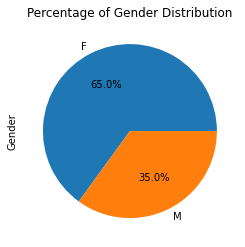

In [71]:
# showing the percentage value count of gender distribution
df_show['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Percentage of Gender Distribution")

In [72]:
# plot showing the gender distribution with respect to the no_show 
def cp(data, x):
    ax=sns.countplot(x='Gender', hue='No_show', data=data)
    ax.set_title(f"show/no show by {x}")
    plt.show()
    df_show.groupby('Gender')["No_show"].value_counts().unstack()

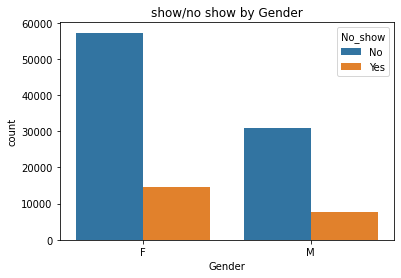

In [73]:
cp(df_show, 'Gender')

This shows that female would show up more compare to male.

# 2 What age group would most likely show up for the appointment.
Exploring the age column by bining and investigate against the No show column


In [74]:
# View the min, 25%, 50%, 75%, max age values with Pandas describe
df_show['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [75]:
# bin edges that will be used to "cut" the data into groups
age_edges = [0, 18, 37, 55, 115 ] # Fill in this list with fi
# Labels for the four age groups
age_names = ['Child' , 'Youth' , 'Adult' , 'Old' ] # Name of each Age group
# Creates Age group column
df_show['Age_group'] = pd.cut(df_show['Age'], age_edges, labels=age_names)

# Checks for successful creation of this column
df_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Old
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Old


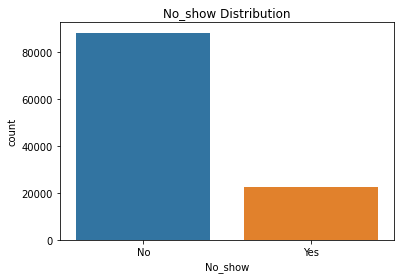

In [76]:
# showing count plot of No_show distribution in our dataset
sns.countplot(x = 'No_show', data = df_show)
plt.title("No_show Distribution")
plt.show()

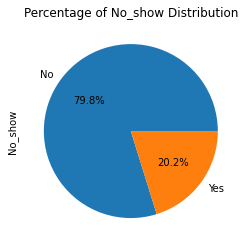

In [77]:
# showing the percentage of No show distribution.
df_show['No_show'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Percentage of No_show Distribution")

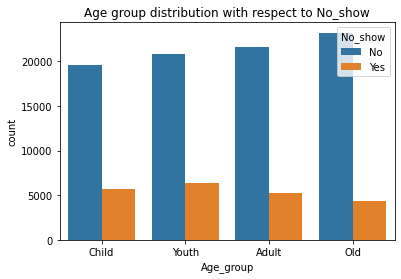

In [78]:
# showing the count plot of age group distribution with respect to the no_show 
sns.countplot(x = 'Age_group', data = df_show, hue = 'No_show')
plt.title('Age group distribution with respect to No_show')
plt.show()

# 3 Does receiving sms by a certain age group makes a patient to show up or not? what gender most likey will respond to this?
Exploring if SMS received has anything to do with showing up or not against the age group and gender


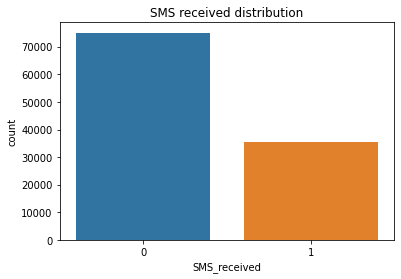

In [79]:
 # showing the count plot of sms received distribution
sns.countplot(x = 'SMS_received', data = df_show)
plt.title("SMS received distribution")
plt.show()

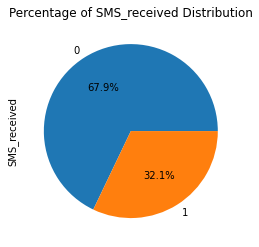

In [80]:
df_show['SMS_received'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Percentage of SMS_received Distribution")

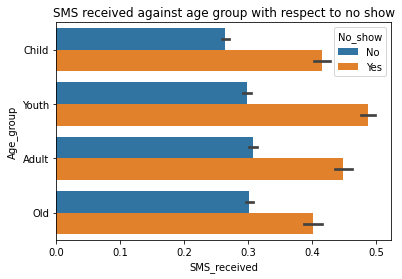

In [81]:
#plotting having a sms received against age group with respect to no show
sns.barplot(x = 'SMS_received', y = 'Age_group', hue = 'No_show', data = df_show)
plt.title('SMS received against age group with respect to no show')
plt.show()

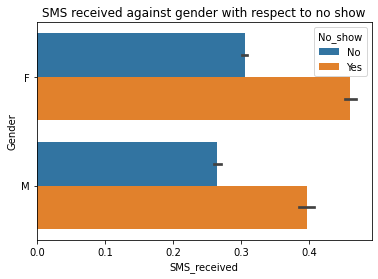

In [82]:
#plotting sms received against gender with respect to no show
sns.barplot(x = 'SMS_received', y = 'Gender', hue = 'No_show', data = df_show)
plt.title('SMS received against gender with respect to no show')
plt.show()

# 4 Does receiving a scholarship by a certain age group makes a patient to show up on the appointment day? what gender most likely will respond to this.
Exploring if Scholarship received has anything to do with showing up or not against the age group and gender


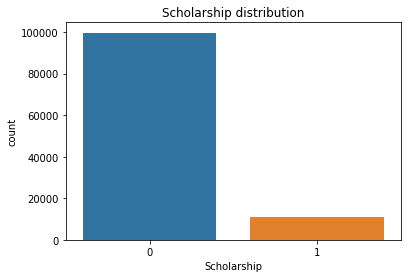

In [83]:
# showing the count plot of scholarship distribution
sns.countplot(x = 'Scholarship', data = df_show)
plt.title("Scholarship distribution")
plt.show()

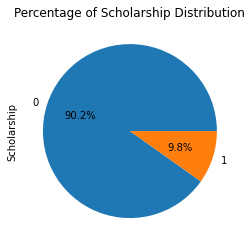

In [84]:
# showing the percentage distribution of scholarship
df_show['Scholarship'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Percentage of Scholarship Distribution")

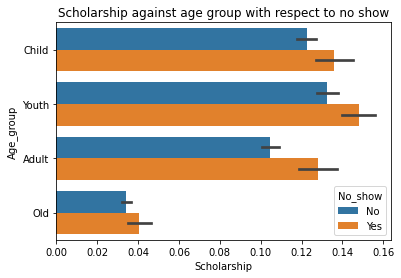

In [85]:
#plotting scholarship against age group with respect to no show
sns.barplot(x = 'Scholarship', y = 'Age_group', hue = 'No_show', data = df_show)
plt.title('Scholarship against age group with respect to no show')
plt.show()

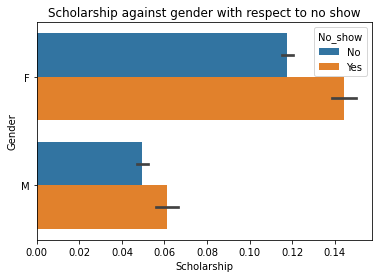

In [86]:
#plotting having a sms received against age group with respect to no show
sns.barplot(x = 'Scholarship', y = 'Gender', hue = 'No_show', data = df_show)
plt.title('Scholarship against gender with respect to no show')
plt.show()

# 5 What is the average mean of age group of patient that received scholarship?

In [87]:
# groupby average mean of age group by scholarship.
average_mean = df_show.groupby('Age_group').mean()['Scholarship']
average_mean

Age_group
Child    0.125676
Youth    0.136294
Adult    0.109344
Old      0.035268
Name: Scholarship, dtype: float64

Text(0, 0.5, 'Average mean')

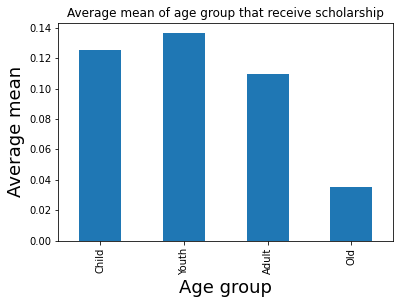

In [88]:
#viewing bar plot of average mean age group that receive scholarship 
average_mean.plot(kind='bar')
plt.title("Average mean of age group that receive scholarship")
plt.xlabel('Age group', fontsize=18)
plt.ylabel("Average mean", fontsize=18)


it shows that the average mean people that received scholarship are the youth and child while the old people receive less scholarship.

# 6 Does waiting days determines whether a patient will show up or not
This can be done by subtracting scheduledDay from AppointmentDay to get the waiting days. 

In [89]:
# making new waiting days column and confirming the changes.
df_show['Waiting_days'] = (df_show['AppointmentDay'].dt.date - df_show['ScheduledDay'].dt.date).dt.days
df_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group,Waiting_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Old,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Old,0


In [90]:
# checking summary statistics of the waiting days.
df_show['Waiting_days'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_days, dtype: float64

Some values shows negative waiting days.This could be as a result of wrong data entry.




In [91]:
#exploring values less than 0
df_show.query('Waiting_days < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group,Waiting_days
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Adult,-1
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Youth,-1
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Youth,-1
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Old,-6
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Child,-1


Five patients falls a victim of this.This could be as a result of data entry error and there is no negative waiting days hence this need to be drop.


In [92]:
# dropping row with negative age and confirming changes
df_show.drop(df_show[df_show['Waiting_days'] < 0].index, inplace = True)
df_show.query('Waiting_days < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group,Waiting_days


In [93]:
df_show['Waiting_days'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_days, dtype: float64

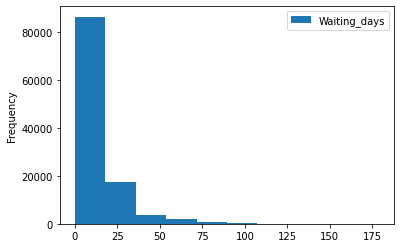

In [94]:
# checking the distribution of waiting day columns with histogram plot
df_show.plot(y='Waiting_days', kind='hist');

In [95]:
#checking the average mean waiting day with respect to No show
waiting_days_mean = df_show.groupby('No_show')['Waiting_days'].mean()
waiting_days_mean

No_show
No      8.754759
Yes    15.835484
Name: Waiting_days, dtype: float64

Text(0, 0.5, 'Average mean')

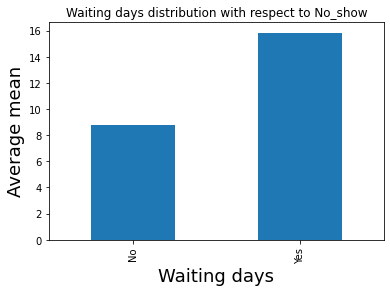

In [96]:
#viewing bar plot of average mean age waiting days with respect to No show
waiting_days_mean.plot(kind='bar')
plt.title("Waiting days distribution with respect to No_show")
plt.xlabel('Waiting days', fontsize=18)
plt.ylabel("Average mean", fontsize=18)

What certain features are asscociated with waiting day.

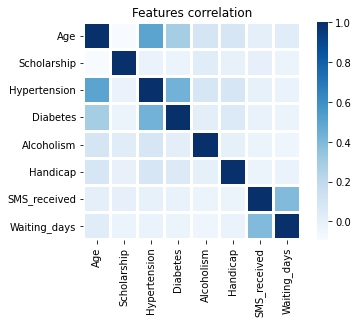

In [97]:
# using heatmap to check correlation between features.
corr = df_show.corr()
heat_map = sns.heatmap(corr, cbar=1, linewidths=2, square=True, cmap='Blues')
heat_map.set_title('Features correlation')
plt.show()

Age and Hypertension, Hypertension and Diabetes, SMS_received and Waiting_days  shows positive correlation While Age and Scholarship shows a negative correlation.

# Conclusion
There is little or no significant difference between the distribution of Age of patients who showed up for the appointment and the patients that did not showed up for the appointment.However there is significant difference in the gender distributions,this shows that female would showed up for the appointment compared to male.

79.8% of patients showed up for the appointment, while 20.2% did not.
Based on this the most 79.9% of patients that showed up are Old and Adult showed.

There is a higher amount of Youth and Adult that received an SMS and did not showed up compared to old people who received an SMS and showed up.

Children and youth are the majority of people who received scholarships.


# Limitations:

The dataset contains incorrect data with negative waiting days values.

There is no much information to draw conclusion from,such as other medical history of the patient and the location distant of patient.

# In general:

Patient showing up during the waiting days is twice more than patient not showing up therefore the longer the waiting days, the greater the possibility of patients not showing up.This means that sending a regular SMS to patients will make them to show up for their appointment date.

There should be more old patients that received scholarship.
